In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("train-data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.describe(include='number')

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [8]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

In [12]:
df['Power'] = df['Power'].replace('null bhp',None)
print('The number of data appearing as "null nhp":', (df['Power'] == 'null bhp').sum())
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

The number of data appearing as "null nhp": 0


In [13]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [14]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [15]:
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Engine'].fillna(df['Engine'].mean(), inplace=True)
df['Power'].fillna(df['Power'].mean(), inplace=True)
df['Seats'].fillna(df['Seats'].mean(), inplace=True)

In [16]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [17]:
df.shape

(6019, 12)

In [18]:
z_scores = stats.zscore(df["Kilometers_Driven"])

threshold = 2.5 
outliers = df['Kilometers_Driven'][abs(z_scores) > threshold]

outliers

340      775000
358      620000
1528     299322
1860     720000
2328    6500000
2823     480000
3092     480000
3649     300000
4491     445000
Name: Kilometers_Driven, dtype: int64

In [19]:
df = df[df["Kilometers_Driven"] <= 300000]

In [20]:
df["Seats"].min()

0.0

In [21]:
df = df[df['Seats'] != 0]

In [22]:
df['Name'].nunique()

1874

In [23]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3210,Mercedes-Benz M-Class ML 350 4Matic,Coimbatore,2016,22769,Diesel,Automatic,First,0.0,2987.0,165.0,5.0,49.22


In [24]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)

In [25]:
df['Company'].nunique() , df['Model'].nunique()

(30, 215)

In [26]:
new_order = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission',
             'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
df = df.reindex(columns=new_order)

In [27]:
df.sample()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
761,tata,tata nano,Chennai,First,Petrol,Manual,2011,35000,25.4,624.0,37.48,4.0,1.6


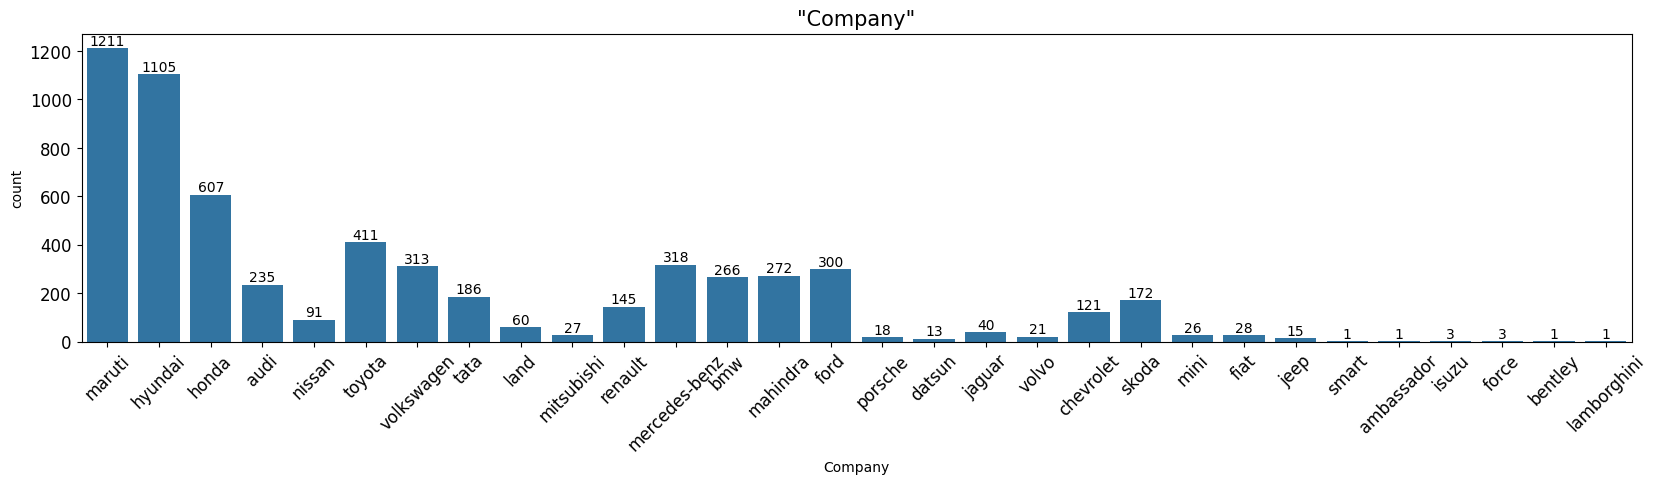

In [28]:
plt.figure(figsize=(20, 4), dpi=100)
graph = sns.countplot(data=df, x='Company')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Company"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

In [29]:
df.Model.value_counts()

Model
maruti swift          353
honda city            269
hyundai i20           246
hyundai verna         170
toyota innova         164
                     ... 
fiat petra              1
volkswagen beetle       1
ambassador classic      1
smart fortwo            1
jaguar f                1
Name: count, Length: 215, dtype: int64

In [30]:
threshold = 10
counts = df['Model'].value_counts()
filtered_models = counts[counts >= threshold].index.tolist()
df = df[df['Model'].isin(filtered_models)]

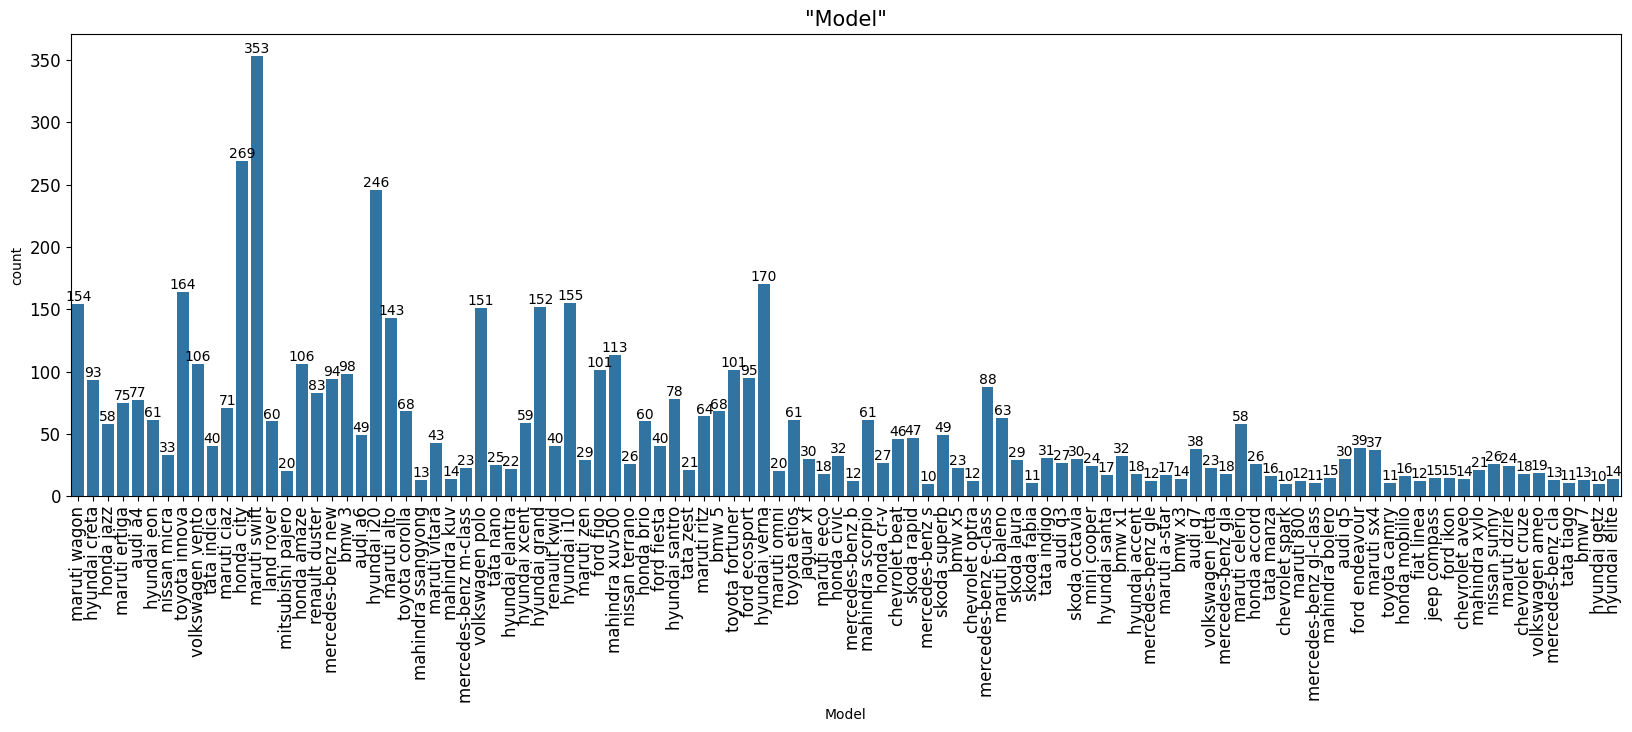

In [31]:
plt.figure(figsize=(20,6), dpi=100)
graph = sns.countplot(data=df, x='Model')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Model"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

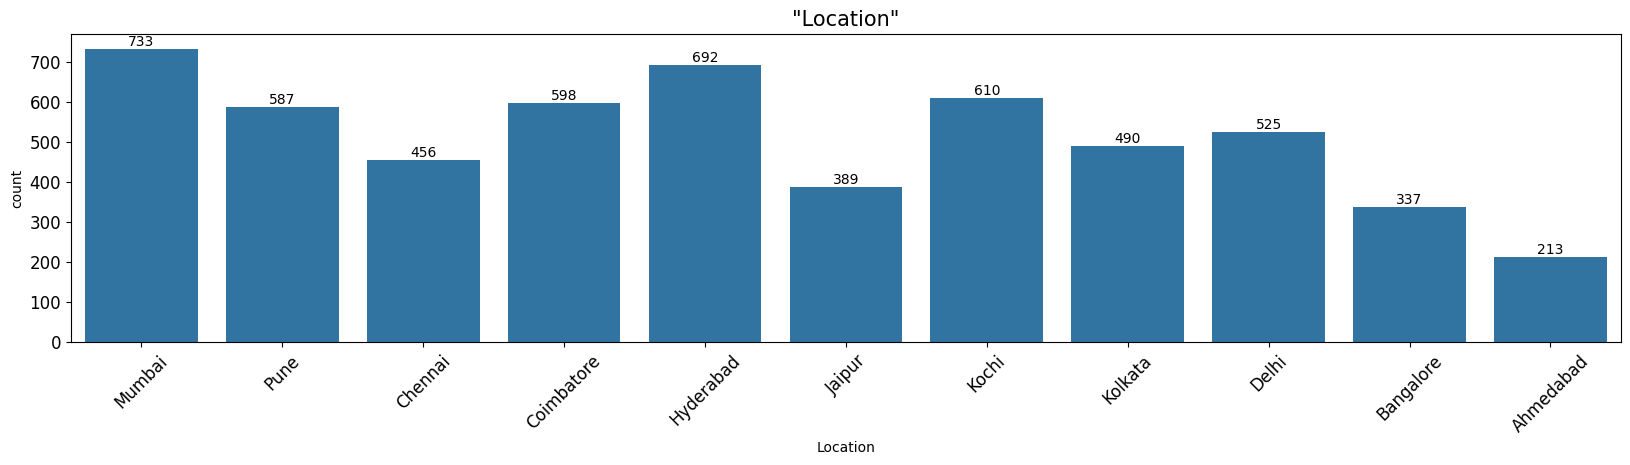

In [32]:
plt.figure(figsize=(20,4), dpi=100)
graph = sns.countplot(data=df, x='Location')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Location"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

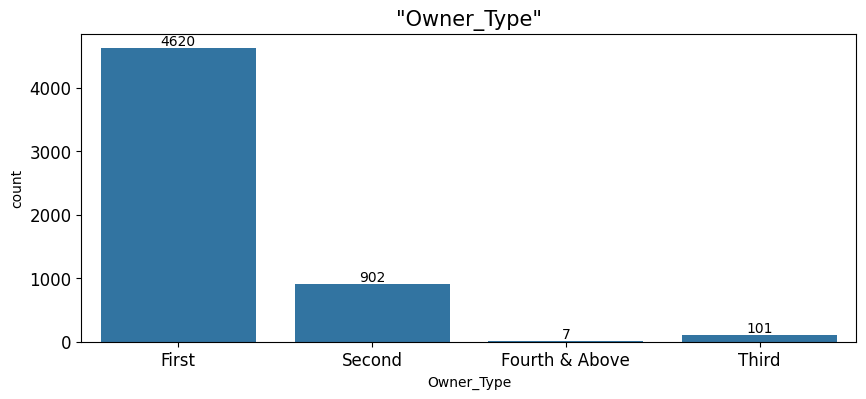

In [33]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Owner_Type')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Owner_Type"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

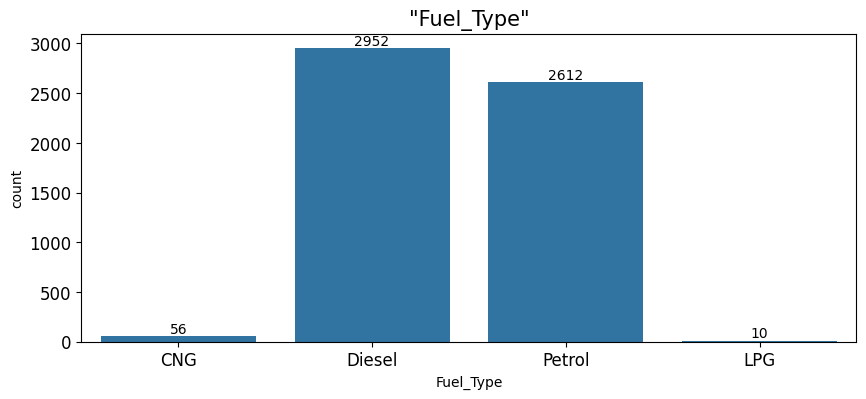

In [34]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Fuel_Type')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Fuel_Type"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

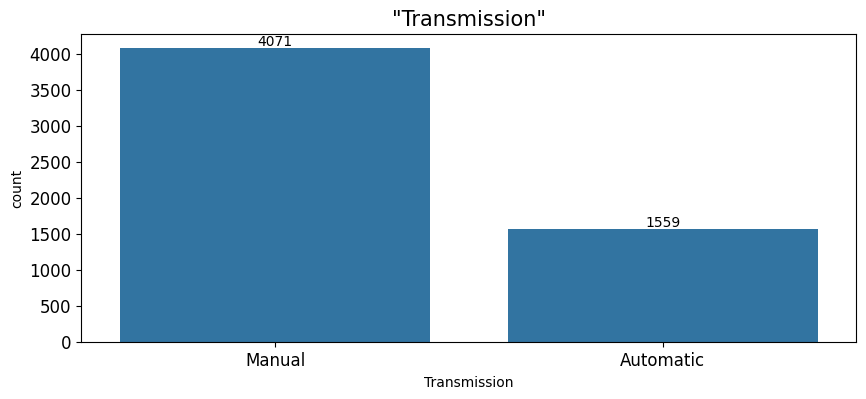

In [35]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Transmission')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Transmission"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

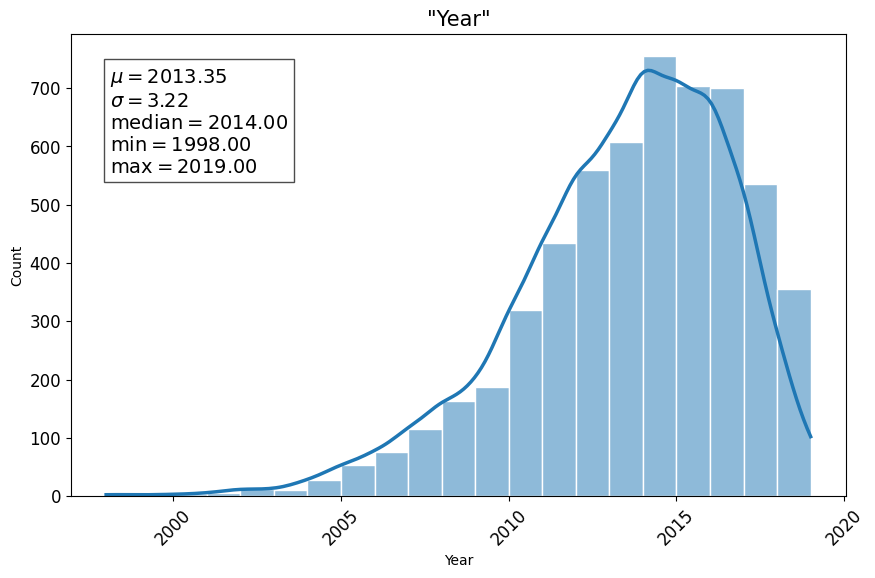

In [36]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Year', bins=21,
                     kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Year"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Year'].mean(),
    r'$\sigma=%.2f$' %df['Year'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Year']),
    r'$\mathrm{min}=%.2f$' %df['Year'].min(),
    r'$\mathrm{max}=%.2f$' %df['Year'].max()
))

plt.text(0.05, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

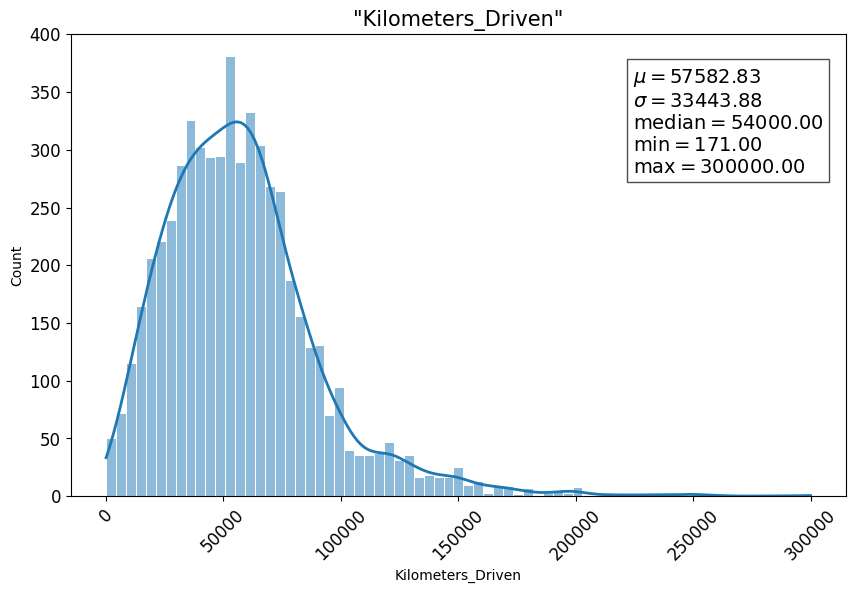

In [37]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Kilometers_Driven', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Kilometers_Driven"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Kilometers_Driven'].mean(),
    r'$\sigma=%.2f$' %df['Kilometers_Driven'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Kilometers_Driven']),
    r'$\mathrm{min}=%.2f$' %df['Kilometers_Driven'].min(),
    r'$\mathrm{max}=%.2f$' %df['Kilometers_Driven'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

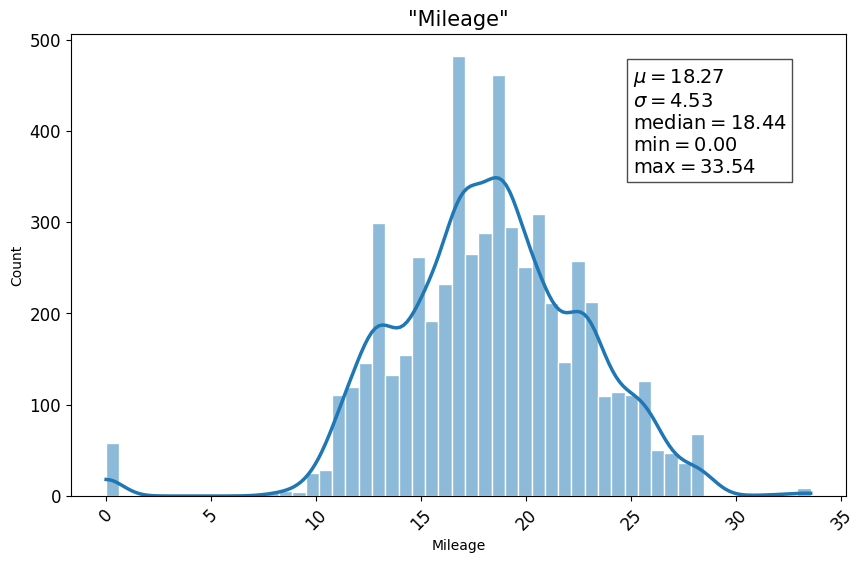

In [38]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Mileage', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Mileage"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Mileage'].mean(),
    r'$\sigma=%.2f$' %df['Mileage'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Mileage']),
    r'$\mathrm{min}=%.2f$' %df['Mileage'].min(),
    r'$\mathrm{max}=%.2f$' %df['Mileage'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

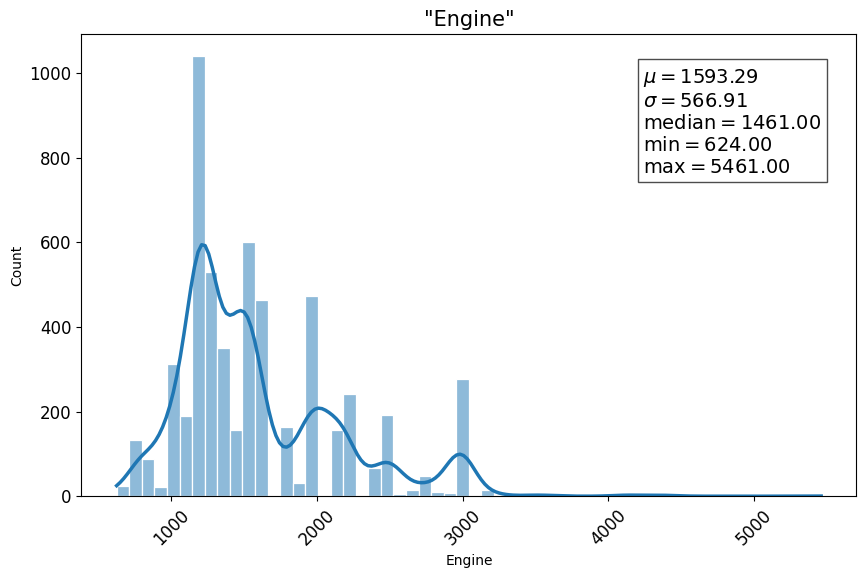

In [39]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Engine', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Engine"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Engine'].mean(),
    r'$\sigma=%.2f$' %df['Engine'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Engine']),
    r'$\mathrm{min}=%.2f$' %df['Engine'].min(),
    r'$\mathrm{max}=%.2f$' %df['Engine'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

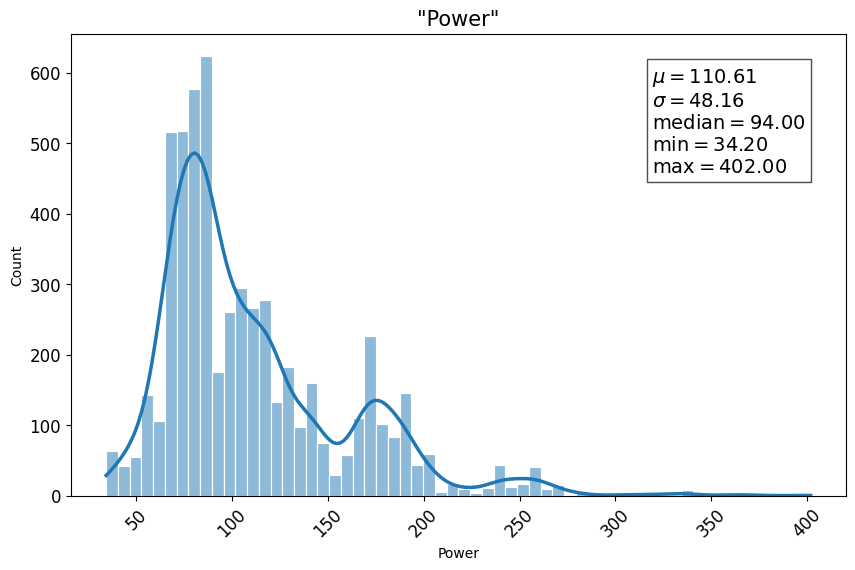

In [40]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Power', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Power"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Power'].mean(),
    r'$\sigma=%.2f$' %df['Power'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Power']),
    r'$\mathrm{min}=%.2f$' %df['Power'].min(),
    r'$\mathrm{max}=%.2f$' %df['Power'].max()
))

plt.text(0.75, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

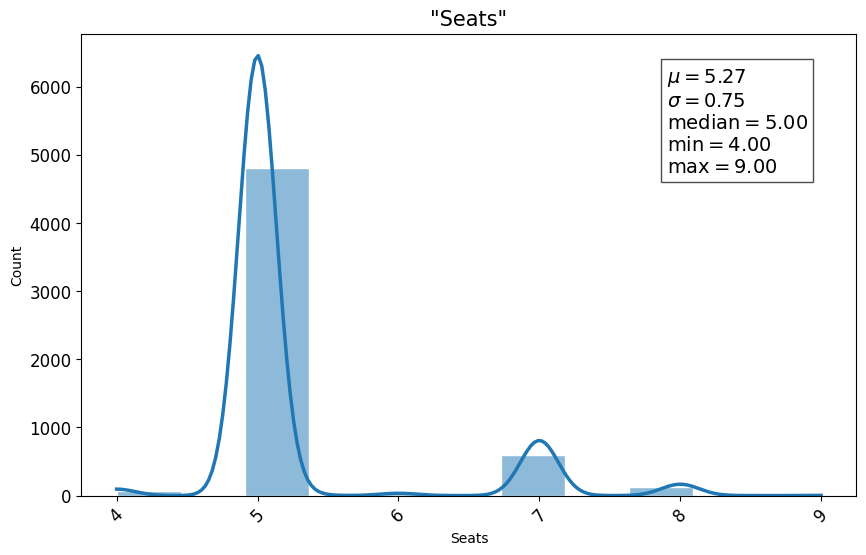

In [41]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Seats', bins=11, kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Seats"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Seats'].mean(),
    r'$\sigma=%.2f$' %df['Seats'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Seats']),
    r'$\mathrm{min}=%.2f$' %df['Seats'].min(),
    r'$\mathrm{max}=%.2f$' %df['Seats'].max()
))

plt.text(0.755, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

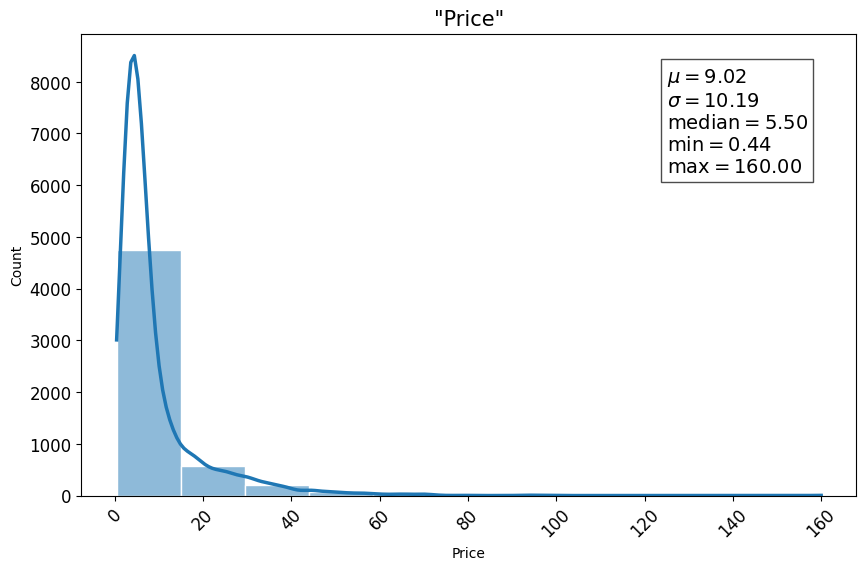

In [42]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Price', bins=11, kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Price"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Price'].mean(),
    r'$\sigma=%.2f$' %df['Price'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Price']),
    r'$\mathrm{min}=%.2f$' %df['Price'].min(),
    r'$\mathrm{max}=%.2f$' %df['Price'].max()
))

plt.text(0.755, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

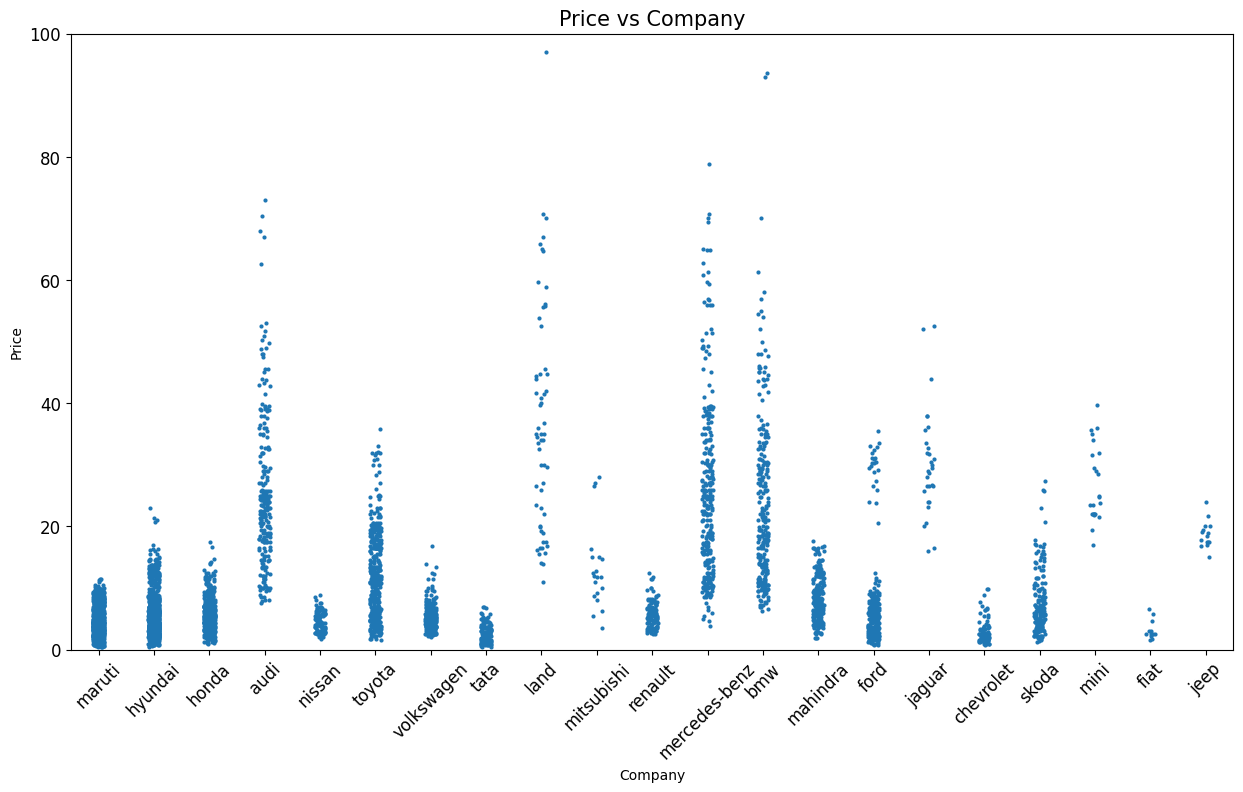

In [43]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Company', y='Price', data=df, size=3)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Company', size=15)
plt.show()

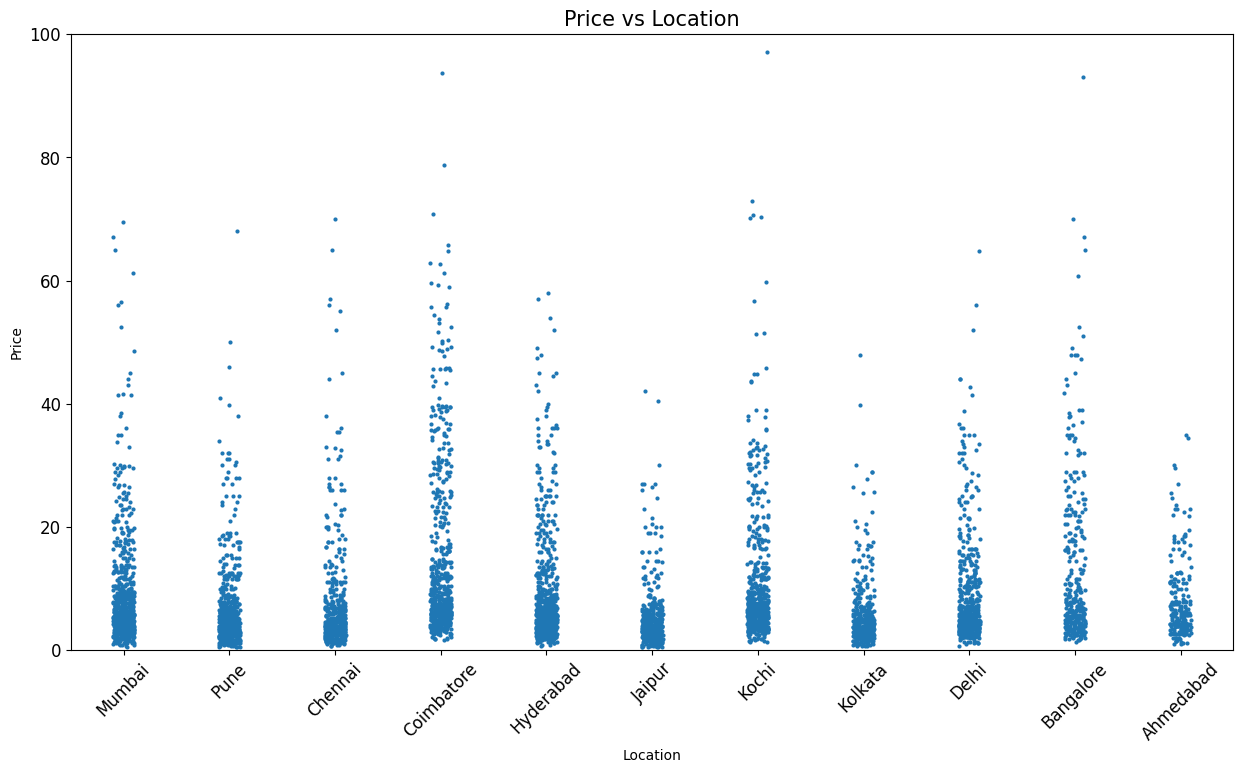

In [44]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Location', y='Price', data=df, size=3)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Location', size=15)
plt.show()

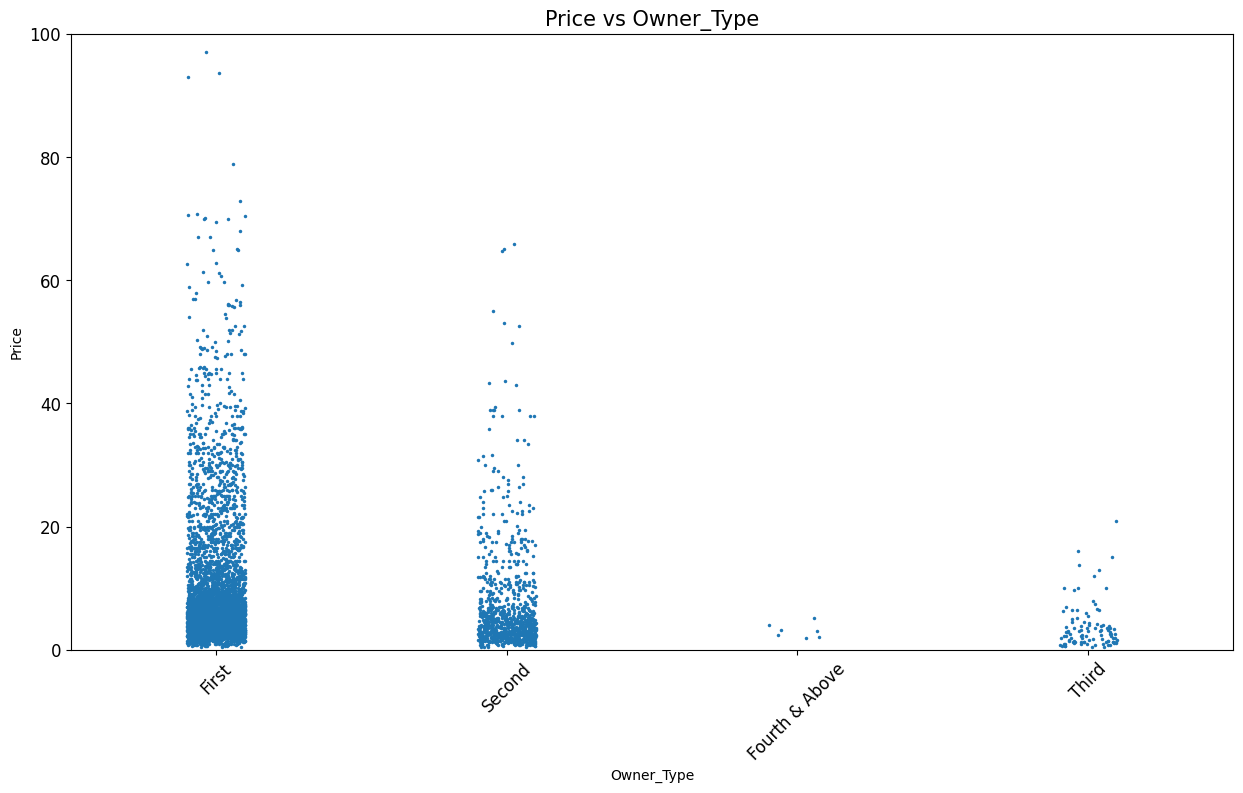

In [45]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Owner_Type', y='Price', data=df, size=2.5)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Owner_Type', size=15)
plt.show()

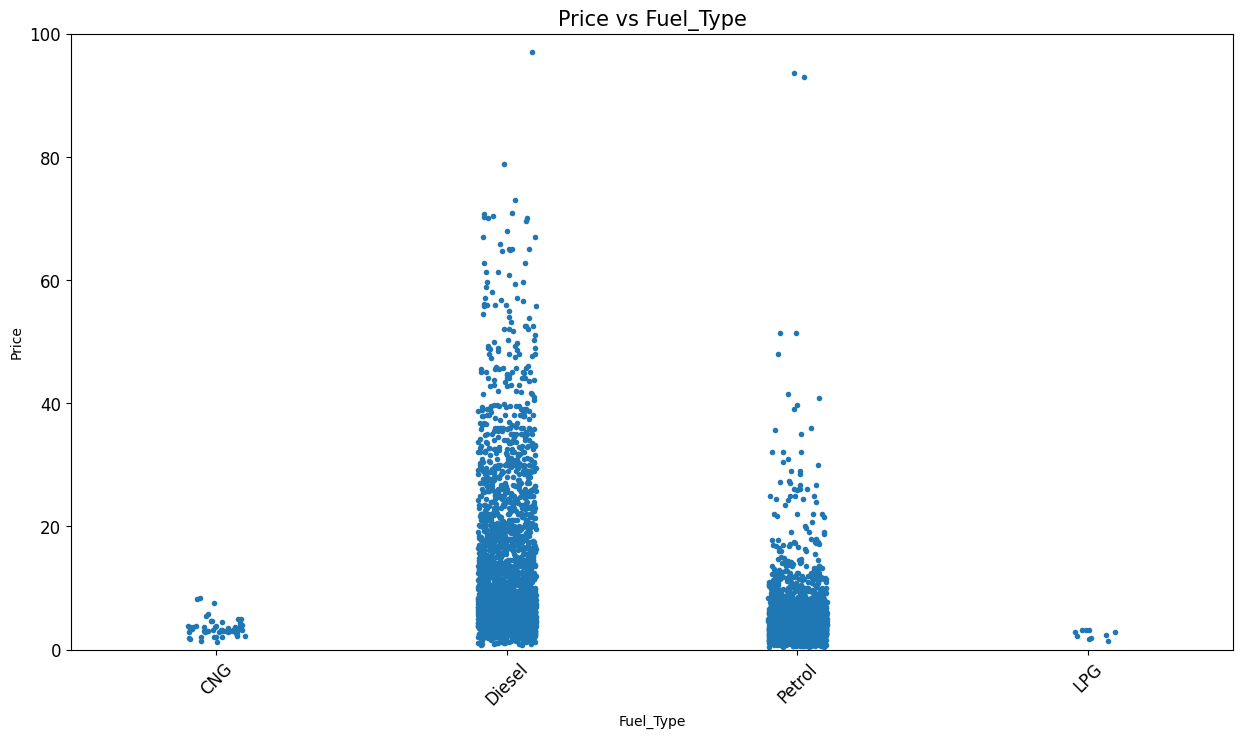

In [46]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Fuel_Type', y='Price', data=df, size=4)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Fuel_Type', size=15)
plt.show()

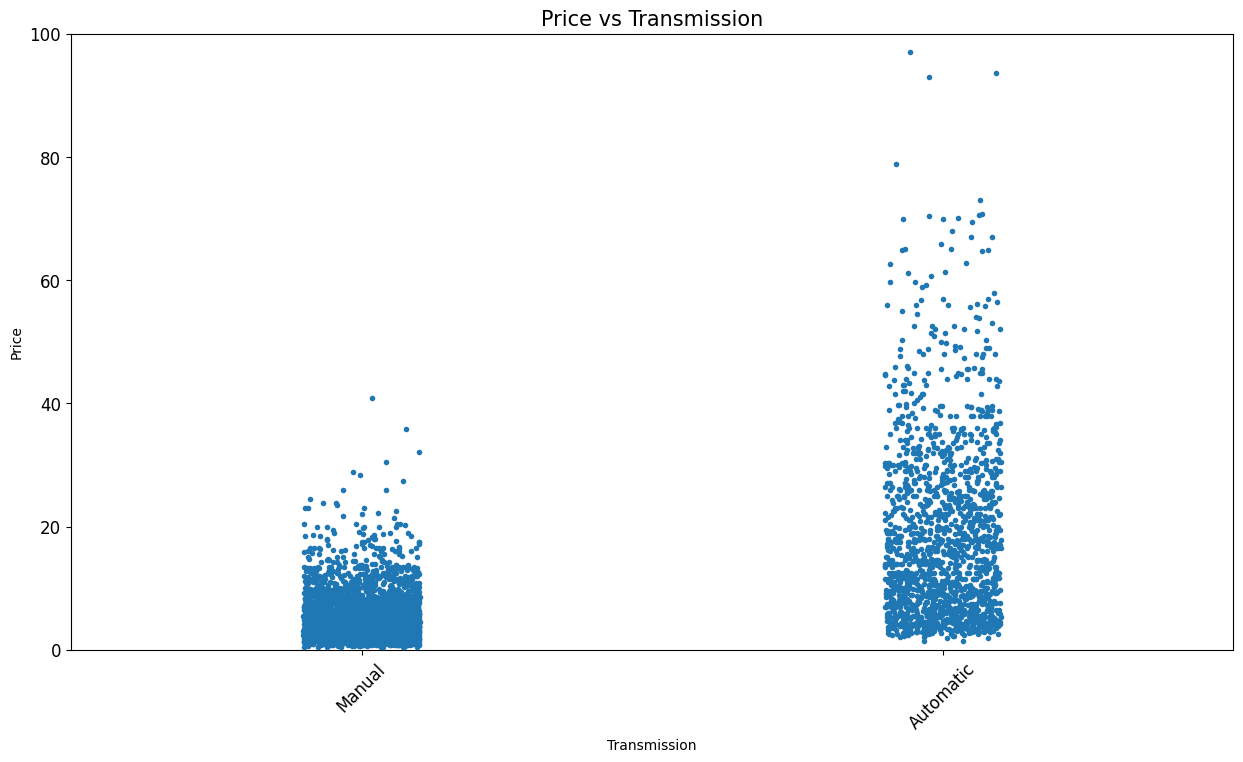

In [47]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Transmission', y='Price', data=df, size=4)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Transmission', size=15)
plt.show()

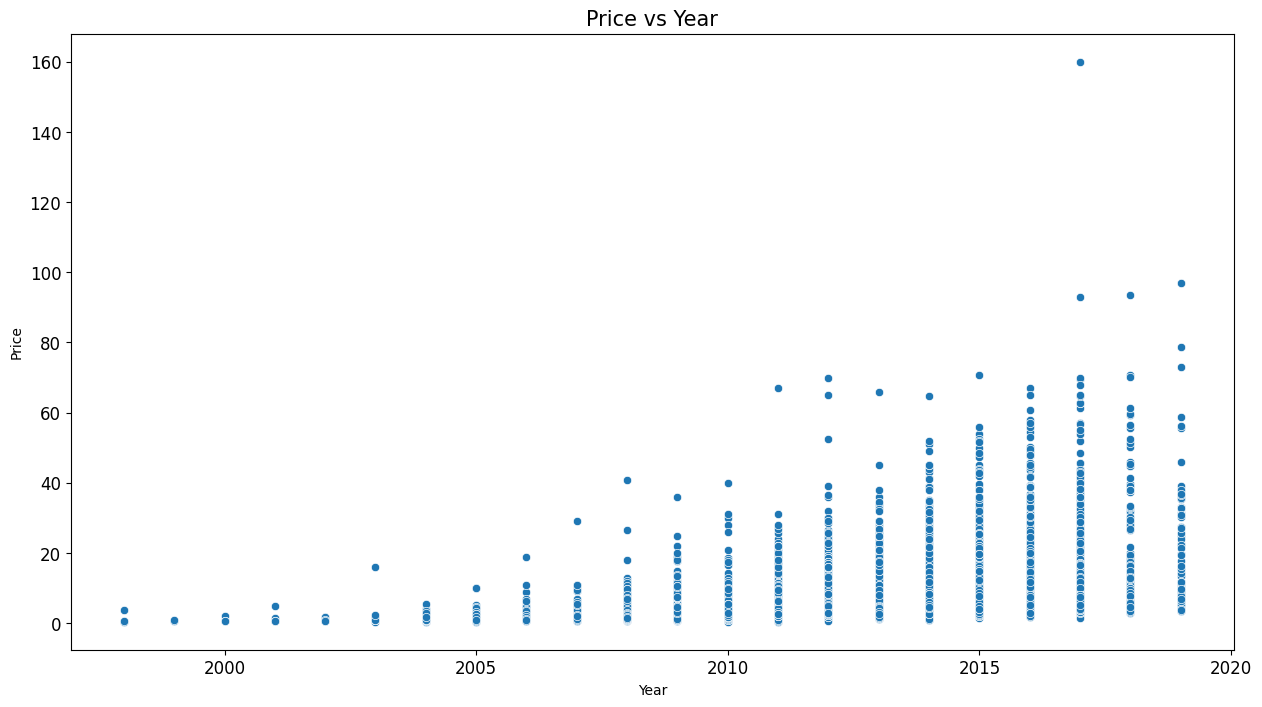

In [48]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Year', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Price vs Year', size=15)
plt.show()

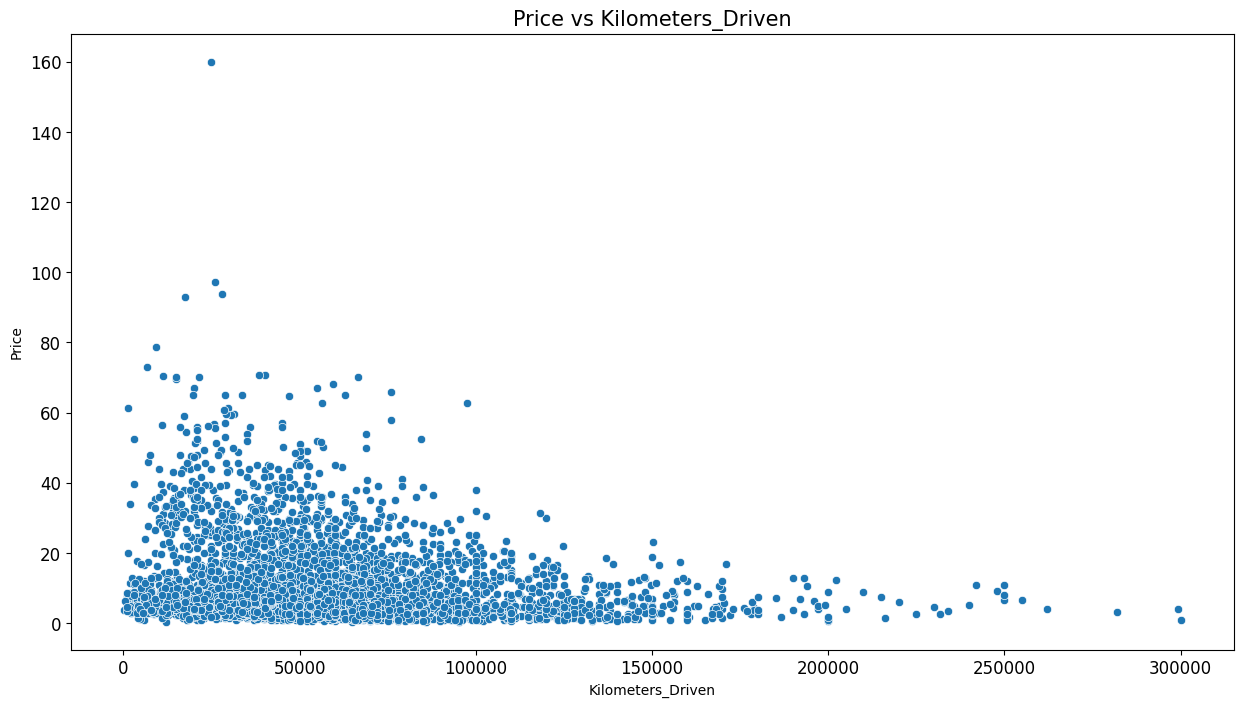

In [49]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Kilometers_Driven', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Price vs Kilometers_Driven', size=15)
plt.show()

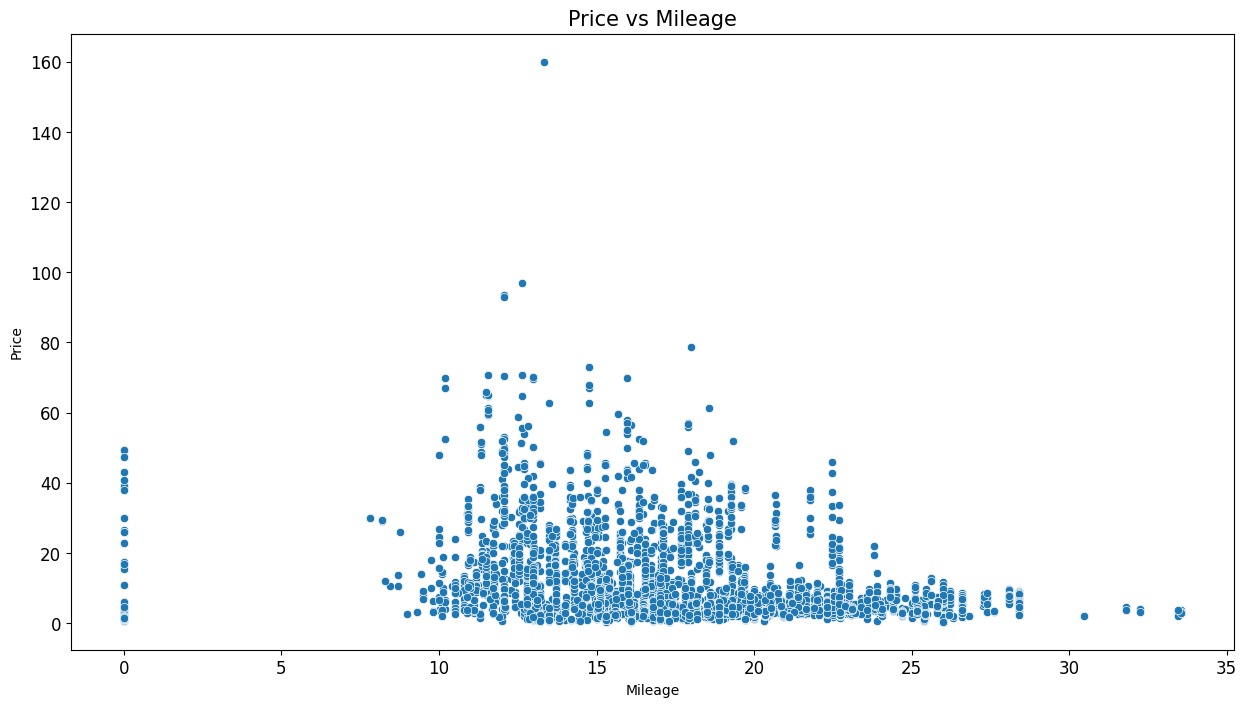

In [50]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Mileage', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Price vs Mileage', size=15)
plt.show()

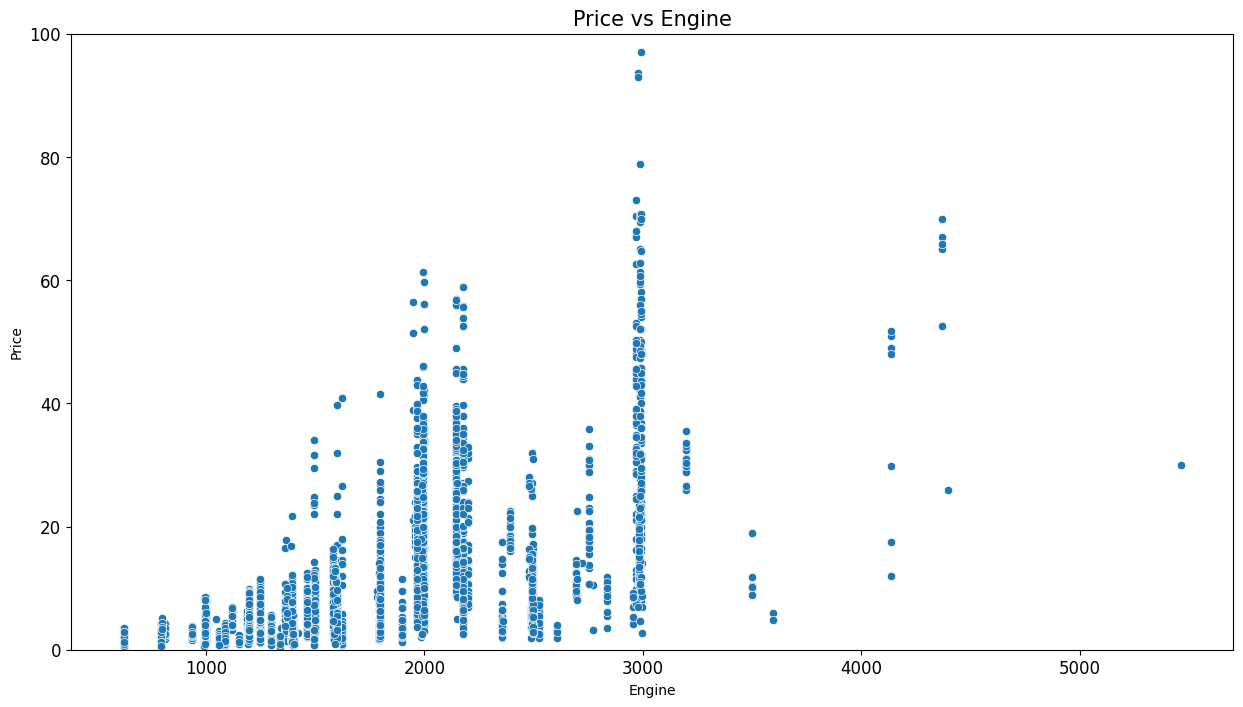

In [51]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Engine', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Engine', size=15)
plt.show()

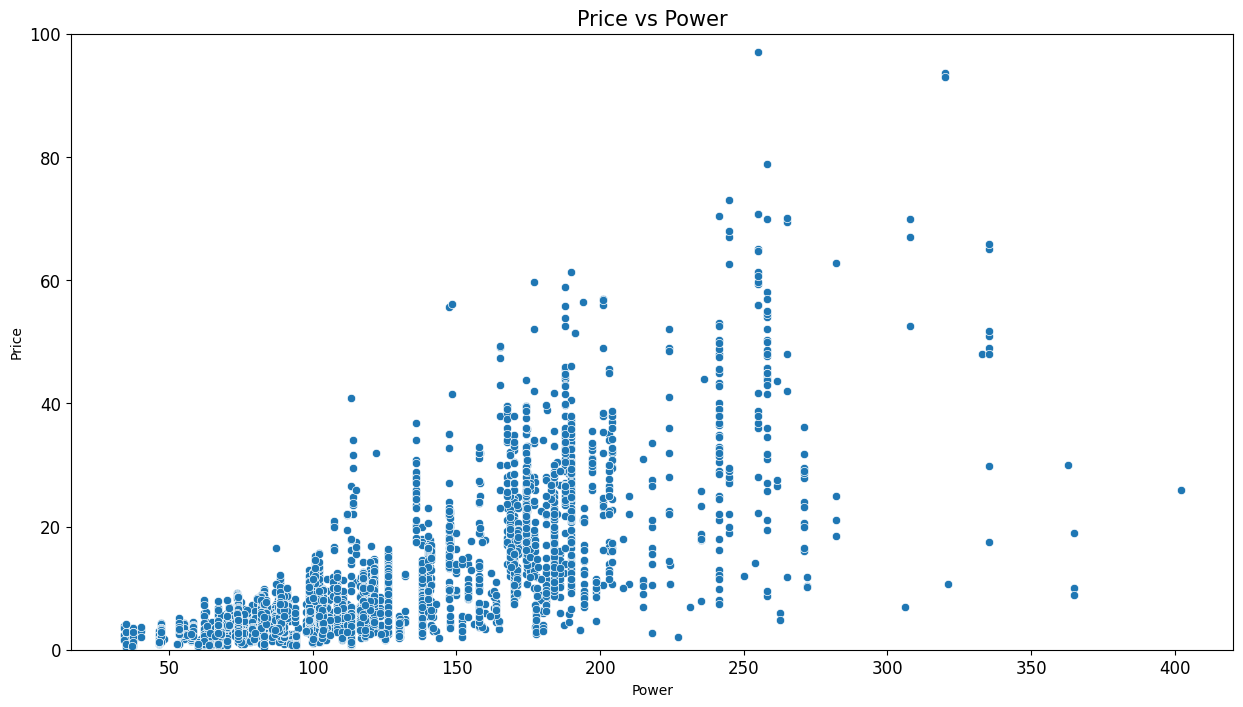

In [52]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Power', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Power', size=15)
plt.show()

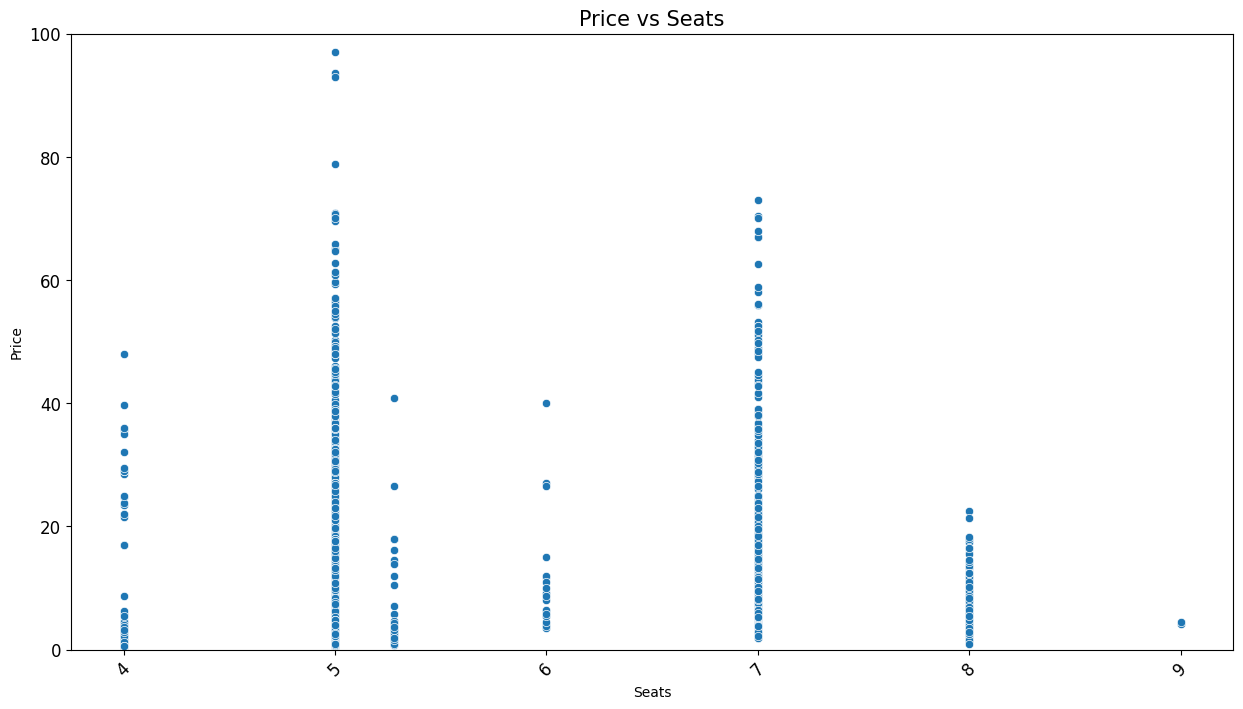

In [53]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Seats', y='Price')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Seats', size=15)
plt.show()

In [54]:
CatCols = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission']

df = pd.get_dummies(df, columns=CatCols, drop_first=True)
df.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_bmw,Company_chevrolet,Company_fiat,...,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,26.60,998.0,58.16,5.0,1.75,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,False,False,False,...,False,False,False,False,True,False,True,False,False,False


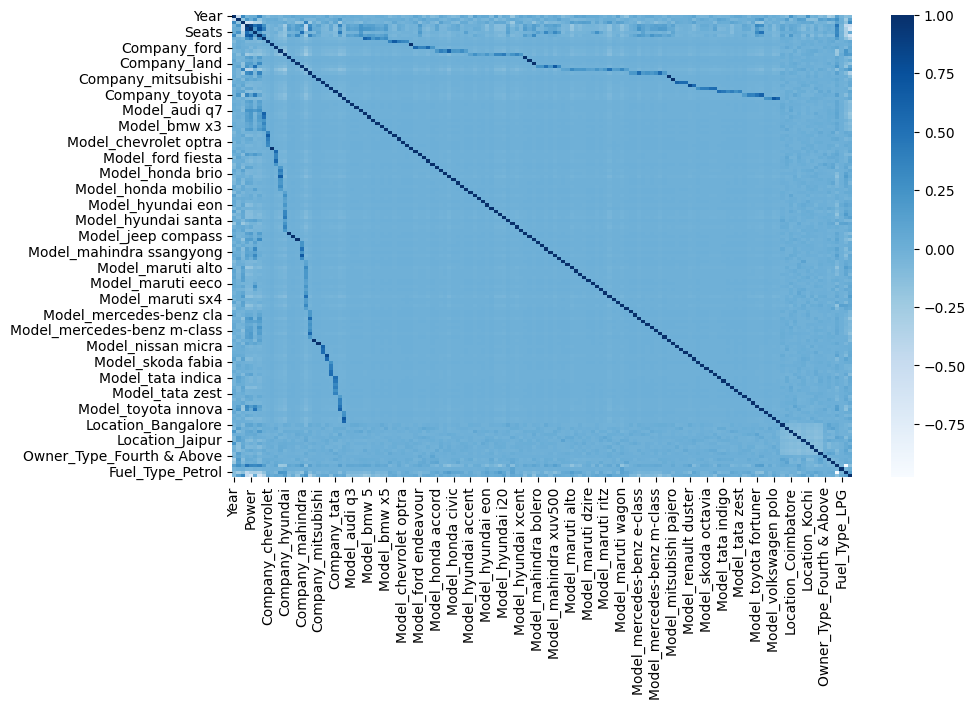

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap='Blues')
plt.show()

In [56]:
X = df.drop('Price', axis=1)
y = df['Price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (4504, 146)
X_test shape:  (1126, 146)
y_train shape:  (4504,)
y_test shape:  (1126,)


In [59]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [60]:
def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared

In [61]:
y_pred = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score = list()
test_score = list()

train_score.append(lin_reg.score(X_train,y_train))
test_score.append(lin_reg.score(X_test,y_test))

MAE: 2.3443924047229485
MSE: 16.764687374503147
RMSE: 4.094470341143424
R2 Score: 0.8298880557305582


In [62]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [63]:
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(ridge.score(X_train,y_train))
test_score.append(ridge.score(X_test,y_test))

MAE: 2.350782727222429
MSE: 16.65612725663975
RMSE: 4.081191891670833
R2 Score: 0.8309896195299493


In [64]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [65]:
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(lasso.score(X_train,y_train))
test_score.append(lasso.score(X_test,y_test))

MAE: 3.634647082133756
MSE: 32.06944853117684
RMSE: 5.662989363505536
R2 Score: 0.6745900403974


In [66]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)

ElasticNet()

In [67]:
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(elastic_net.score(X_train,y_train))
test_score.append(elastic_net.score(X_test,y_test))

MAE: 3.6392783981780146
MSE: 32.05148233429088
RMSE: 5.661402859211742
R2 Score: 0.67477234410609


In [68]:
random_forest = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50)

In [69]:
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(random_forest.score(X_train,y_train))
test_score.append(random_forest.score(X_test,y_test))

MAE: 1.3497812035265722
MSE: 6.119869109128166
RMSE: 2.4738369204796355
R2 Score: 0.9379014466794289


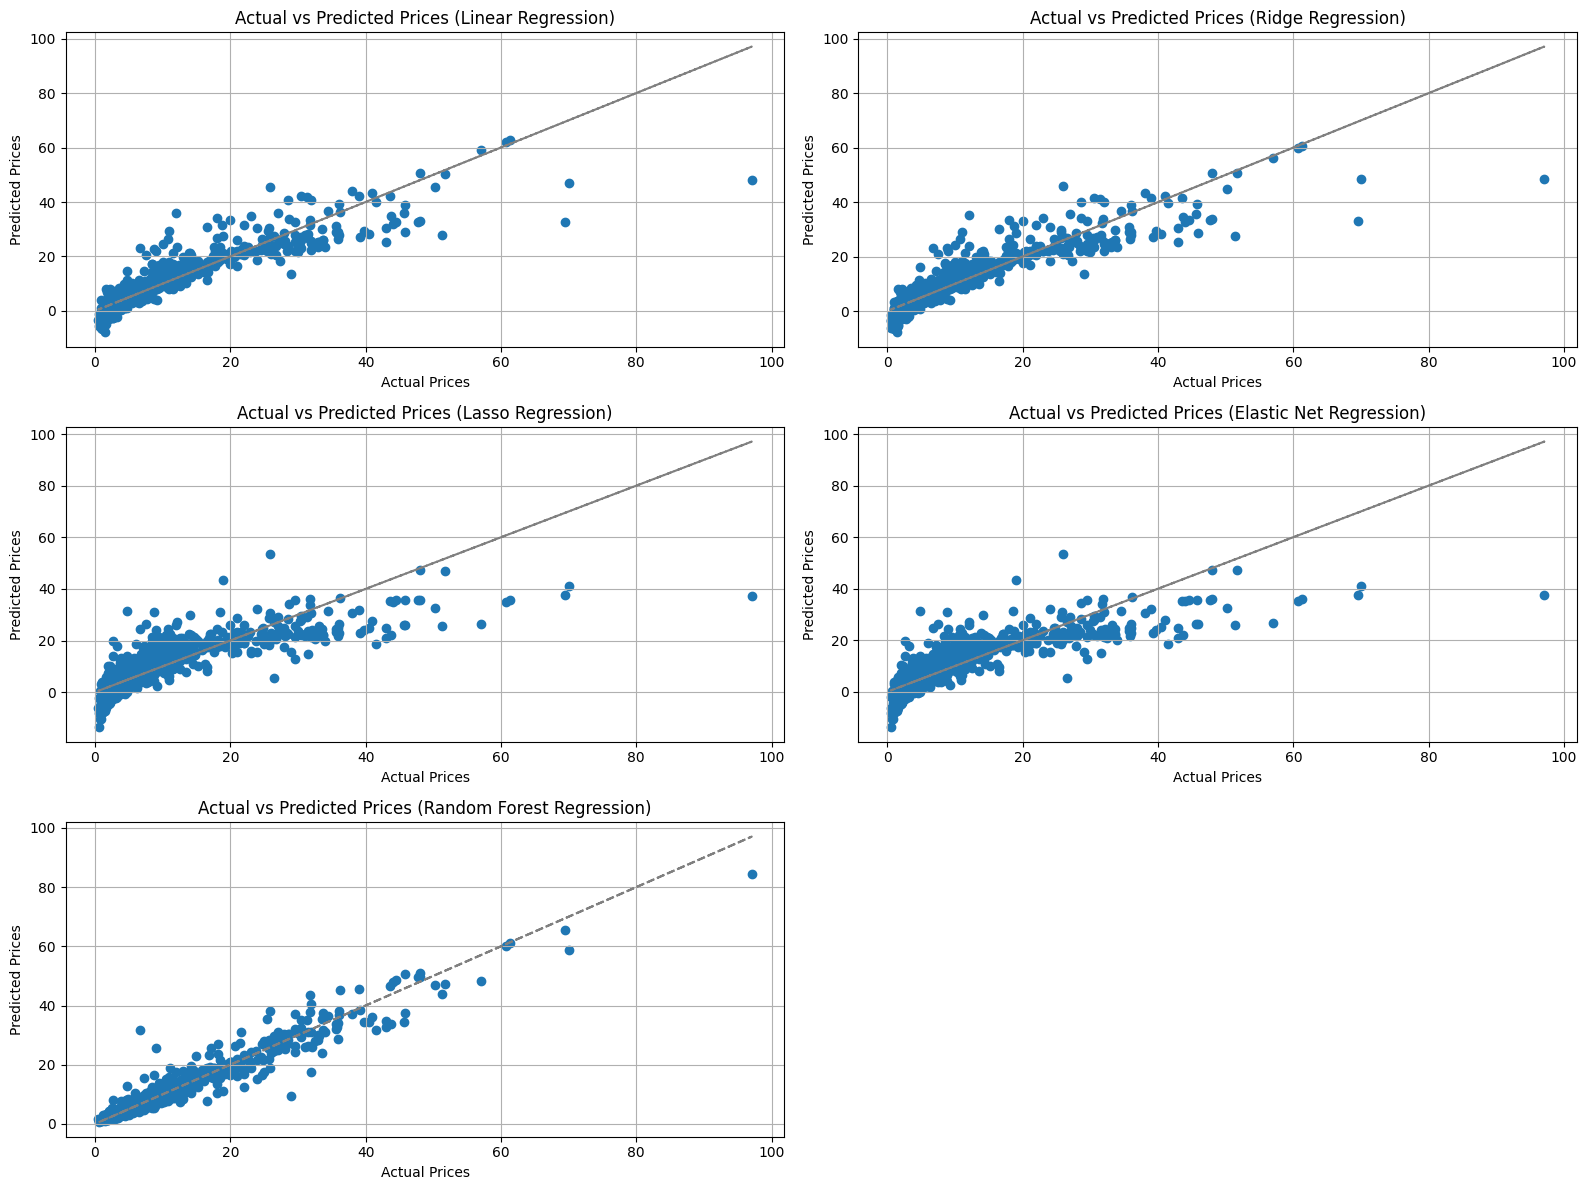

In [70]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(ax, model_name, y_test, predictions):
    ax.scatter(y_test, predictions)
    ax.plot(y_test, y_test, color='gray', linestyle='--')
    ax.set_title(f'Actual vs Predicted Prices ({model_name})')
    ax.set_xlabel('Actual Prices')
    ax.set_ylabel('Predicted Prices')
    ax.grid(True)

fig, axs = plt.subplots(3, 2, figsize=(16, 12))
axs = axs.flatten()

lin_reg_predictions = lin_reg.predict(X_test)
plot_actual_vs_predicted(axs[0], 'Linear Regression', y_test, lin_reg_predictions)

ridge_predictions = ridge.predict(X_test)
plot_actual_vs_predicted(axs[1], 'Ridge Regression', y_test, ridge_predictions)

lasso_predictions = lasso.predict(X_test)
plot_actual_vs_predicted(axs[2], 'Lasso Regression', y_test, lasso_predictions)

elastic_net_predictions = elastic_net.predict(X_test)
plot_actual_vs_predicted(axs[3], 'Elastic Net Regression', y_test, elastic_net_predictions)

random_forest_predictions = random_forest.predict(X_test)
plot_actual_vs_predicted(axs[4], 'Random Forest Regression', y_test, random_forest_predictions)

axs[5].axis('off')

plt.tight_layout()
plt.show()


In [71]:
model_names = ['Linear Regression','Ridge Regression','Lasso Regression','Elastic-Net Regression','Random Forest Regression']

scores = pd.DataFrame([model_names,train_score,test_score])
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Test Set Accuracy']

scores

,Model,Training Set Accuracy,Test Set Accuracy
0,Linear Regression,0.833643,0.829888
1,Ridge Regression,0.833144,0.83099
2,Lasso Regression,0.667695,0.67459
3,Elastic-Net Regression,0.667971,0.674772
4,Random Forest Regression,0.968289,0.937901
